In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from zipfile import ZipFile

filename = "/content/drive/MyDrive/insurance.zip"

with ZipFile(filename,'r') as zip:
  zip.extractall()

In [0]:
df = pd.read_csv("/content/insurance.csv")

In [0]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [0]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [0]:
for col in df.columns:
  print(df[col].isnull().value_counts())

False    1338
Name: age, dtype: int64
False    1338
Name: sex, dtype: int64
False    1338
Name: bmi, dtype: int64
False    1338
Name: children, dtype: int64
False    1338
Name: smoker, dtype: int64
False    1338
Name: region, dtype: int64
False    1338
Name: charges, dtype: int64


In [0]:
from scipy.stats import pearsonr

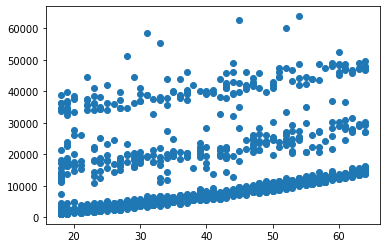

In [0]:
plt.scatter(x = df['age'],y = df['charges'])

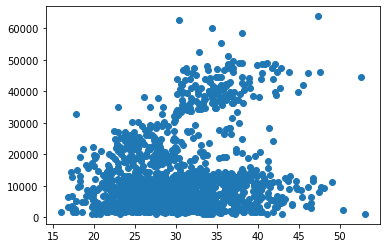

In [0]:
plt.scatter(x = df['bmi'],y = df['charges'])

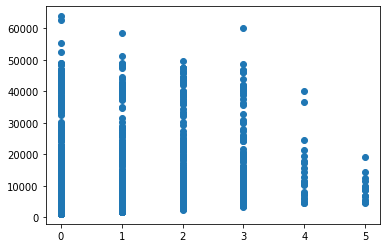

In [0]:
plt.scatter(x = df['children'],y = df['charges'])

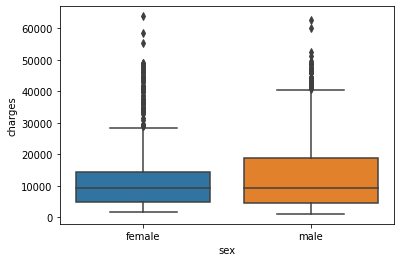

In [0]:
sns.boxplot(x = df['sex'],y=df['charges'])

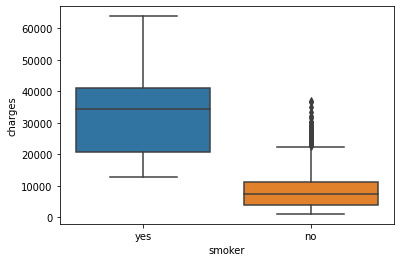

In [0]:
sns.boxplot(x = df['smoker'],y = df['charges'])

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

In [0]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [0]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

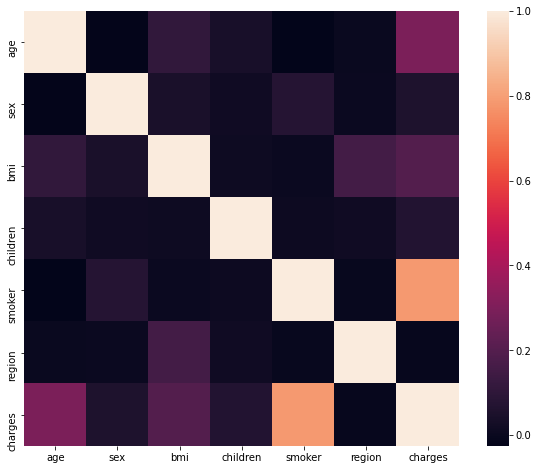

In [0]:
f,ax = plt.subplots(figsize=(10,8))
cor = df.corr()
sns.heatmap(cor,square=True,ax = ax)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [0]:
x = df.drop(['charges'],axis =1)
y = df['charges']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 4)

lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)

y_test_pred = lr.predict(x_test)

print(r2_score(y_train,y_train_pred))


0.7631741807992287


In [0]:
y_train_pred

array([12558.28557835,  9039.37549115,  9233.0546289 , ...,
        4358.82533983,  5004.2460441 , 37587.61319583])

In [0]:
X = df.drop(['charges','region'],axis =1)
Y = df['charges']

quad = PolynomialFeatures(degree=2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y,test_size=0.4,random_state=0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print(plr.score(X_train,Y_train))
print(plr.score(X_test,Y_test))


0.8191000961265755
0.8753005361051133


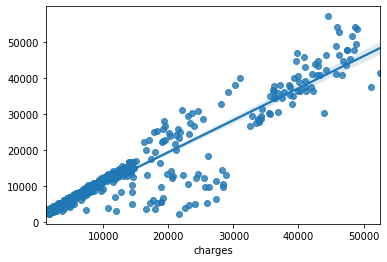

In [0]:
sns.regplot(x = Y_test,y = Y_test_pred)